In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import rc

rc('text.latex', preamble=r'\usepackage{cmbright}')
rc('text', usetex=True)
sns.set_theme()
sns.set(font_scale=3.0, style="whitegrid")

def get_avg_results(settings_files, alg):    
    dataset = settings_files[0].split('_')[0]
    test_acc_list = []
    for i, set in enumerate(settings_files):
        results_path = f"../results/{dataset}/{alg}/{set}"

        with open(f"{results_path}/fedavg_test_results.npy", "rb") as f:
            test_accs = np.load(f)
            test_losses = np.load(f)

        test_acc_list.append(test_accs.max())


    return np.mean(test_acc_list), np.std(test_acc_list)

def get_feded_results(settings_files, n_pub, model, loss, weight_scheme, summary=True):

    test_acc_lists = []
    ensemble_test_acc = []
    dataset = settings_files[0].split('_')[0]

    for i, set in enumerate(settings_files):
        results_path = f"../results/{dataset}/feded/{set}"

        with open(f"{results_path}/w{weight_scheme}_student_cifar10_{model}_{loss}_test_results_{n_pub}.npy", "rb") as f:
            test_acc_lists.append(np.load(f)[0])

            
        with open(f"{results_path}/w{weight_scheme}_ensemble_test_acc.npy", "rb") as f:
            ensemble_test_acc.append(np.load(f)[0])

    if summary:
        return (np.mean(test_acc_lists), np.std(test_acc_lists)), (np.mean(ensemble_test_acc), np.std(ensemble_test_acc))
    else:
        return test_acc_lists, ensemble_test_acc

# Tables

In [6]:
seeds = [0,2,3,4,5,6,7,10]
n_clients = 10
n_pub = 25000
model = "cifar10_resnet18"
student_model = "resnet18"
dists = ["niid10.0", "niid1.0", "niid0.1", "niid0.01"]

table = "\\begin{table}[]\centering\\begin{tabular}{c|cccc}\n"
table += "Algorithm & $\\alpha=10$ & $\\alpha=1$ & $\\alpha=0.1$ & $\\alpha=0.01$ \\\\ \\hline \n"

table += "\\textsc{FedAvg} "

for d in dists:
    settings_files = [f"{model}_c{n_clients}_{d}_s{i}" for i in seeds]
    m, s = get_avg_results(settings_files, "fedavg")
    table += "& {:.2f}$\\pm${:.2f} ".format(m, s)

table += "\\\\ \n \\textsc{FedProx} "

for d in dists:
    settings_files = [f"{model}_c{n_clients}_{d}_s{i}" for i in seeds]
    m, s = get_avg_results(settings_files, "fedprox")
    table += "& {:.2f}$\\pm${:.2f} ".format(m, s)

table += "\\\\ \n \\textsc{FedED-w0} "
for d in dists:
    settings_files = [f"{model}_c{n_clients}_{d}_s{i}" for i in seeds]
    (m, s), _ = get_feded_results(settings_files, n_pub, student_model, "mse", 0)
    table += "& {:.2f}$\\pm${:.2f} ".format(m, s)

table += "\\\\ \n \\textsc{FedED-w1} "
for d in dists:
    settings_files = [f"{model}_c{n_clients}_{d}_s{i}" for i in seeds]
    (m, s), _ = get_feded_results(settings_files, n_pub, student_model, "mse", 1)
    table += "& {:.2f}$\\pm${:.2f} ".format(m, s)

table += "\\\\ \n \\textsc{FedED-w2} (MSE) "
for d in dists:
    settings_files = [f"{model}_c{n_clients}_{d}_s{i}" for i in seeds]
    (m, s), _ = get_feded_results(settings_files, n_pub, student_model, "mse", 2)
    table += "& {:.2f}$\\pm${:.2f} ".format(m, s)

table += "\\\\ \n \\textsc{FedED-w2} (CE) "
for d in dists:
    settings_files = [f"{model}_c{n_clients}_{d}_s{i}" for i in seeds]
    (m, s), _ = get_feded_results(settings_files, n_pub, student_model, "ce", 2)
    table += "& {:.2f}$\\pm${:.2f} ".format(m, s)

table += "\\\\ \n \\textsc{Ensemble-w0} "
for d in dists:
    settings_files = [f"{model}_c{n_clients}_{d}_s{i}" for i in seeds]
    _, (m, s) = get_feded_results(settings_files, n_pub, student_model, "mse", 0)
    table += "& {:.2f}$\\pm${:.2f} ".format(m, s)

table += "\\\\ \n \\textsc{Ensemble-w1} "
for d in dists:
    settings_files = [f"{model}_c{n_clients}_{d}_s{i}" for i in seeds]
    _, (m, s) = get_feded_results(settings_files, n_pub, student_model, "mse", 1)
    table += "& {:.2f}$\\pm${:.2f} ".format(m, s)

table += "\\\\ \n \\textsc{Ensemble-w2} "
for d in dists:
    settings_files = [f"{model}_c{n_clients}_{d}_s{i}" for i in seeds]
    _, (m, s) = get_feded_results(settings_files, n_pub, student_model, "mse", 2)
    table += "& {:.2f}$\\pm${:.2f} ".format(m, s)

table += "\\\\ \n \\end{tabular} \n \\caption{Caption} \n \\label{tab:my_label} \n \\end{table}"

print(table)

\begin{table}[]\centering\begin{tabular}{c|cccc}
Algorithm & $\alpha=10$ & $\alpha=1$ & $\alpha=0.1$ & $\alpha=0.01$ \\ \hline 
\textsc{FedAvg} & 51.36$\pm$0.46 & 50.17$\pm$0.51 & 40.42$\pm$2.33 & 29.99$\pm$2.62 \\ 
 \textsc{FedProx} & 51.58$\pm$0.59 & 49.83$\pm$0.75 & 40.27$\pm$2.96 & 29.91$\pm$2.69 \\ 
 \textsc{FedED-w0} & 48.36$\pm$1.29 & 47.77$\pm$0.63 & 37.41$\pm$2.51 & 24.16$\pm$5.56 \\ 
 \textsc{FedED-w1} & 48.27$\pm$0.99 & 46.88$\pm$1.98 & 33.81$\pm$4.69 & 15.87$\pm$3.93 \\ 
 \textsc{FedED-w2} (MSE) & 47.37$\pm$0.73 & 46.31$\pm$0.87 & 35.38$\pm$1.45 & 24.17$\pm$7.47 \\ 
 \textsc{FedED-w2} (CE) & 45.05$\pm$0.82 & 44.03$\pm$0.73 & 35.32$\pm$1.53 & 24.82$\pm$6.68 \\ 
 \textsc{Ensemble-w0} & 50.65$\pm$0.59 & 49.98$\pm$0.58 & 38.04$\pm$3.34 & 24.52$\pm$5.84 \\ 
 \textsc{Ensemble-w1} & 50.61$\pm$0.58 & 49.96$\pm$0.49 & 38.14$\pm$5.07 & 18.55$\pm$5.75 \\ 
 \textsc{Ensemble-w2} & 50.53$\pm$0.51 & 49.79$\pm$0.68 & 40.14$\pm$1.73 & 28.43$\pm$7.89 \\ 
 \end{tabular} 
 \caption{Caption} 
 

# Figures

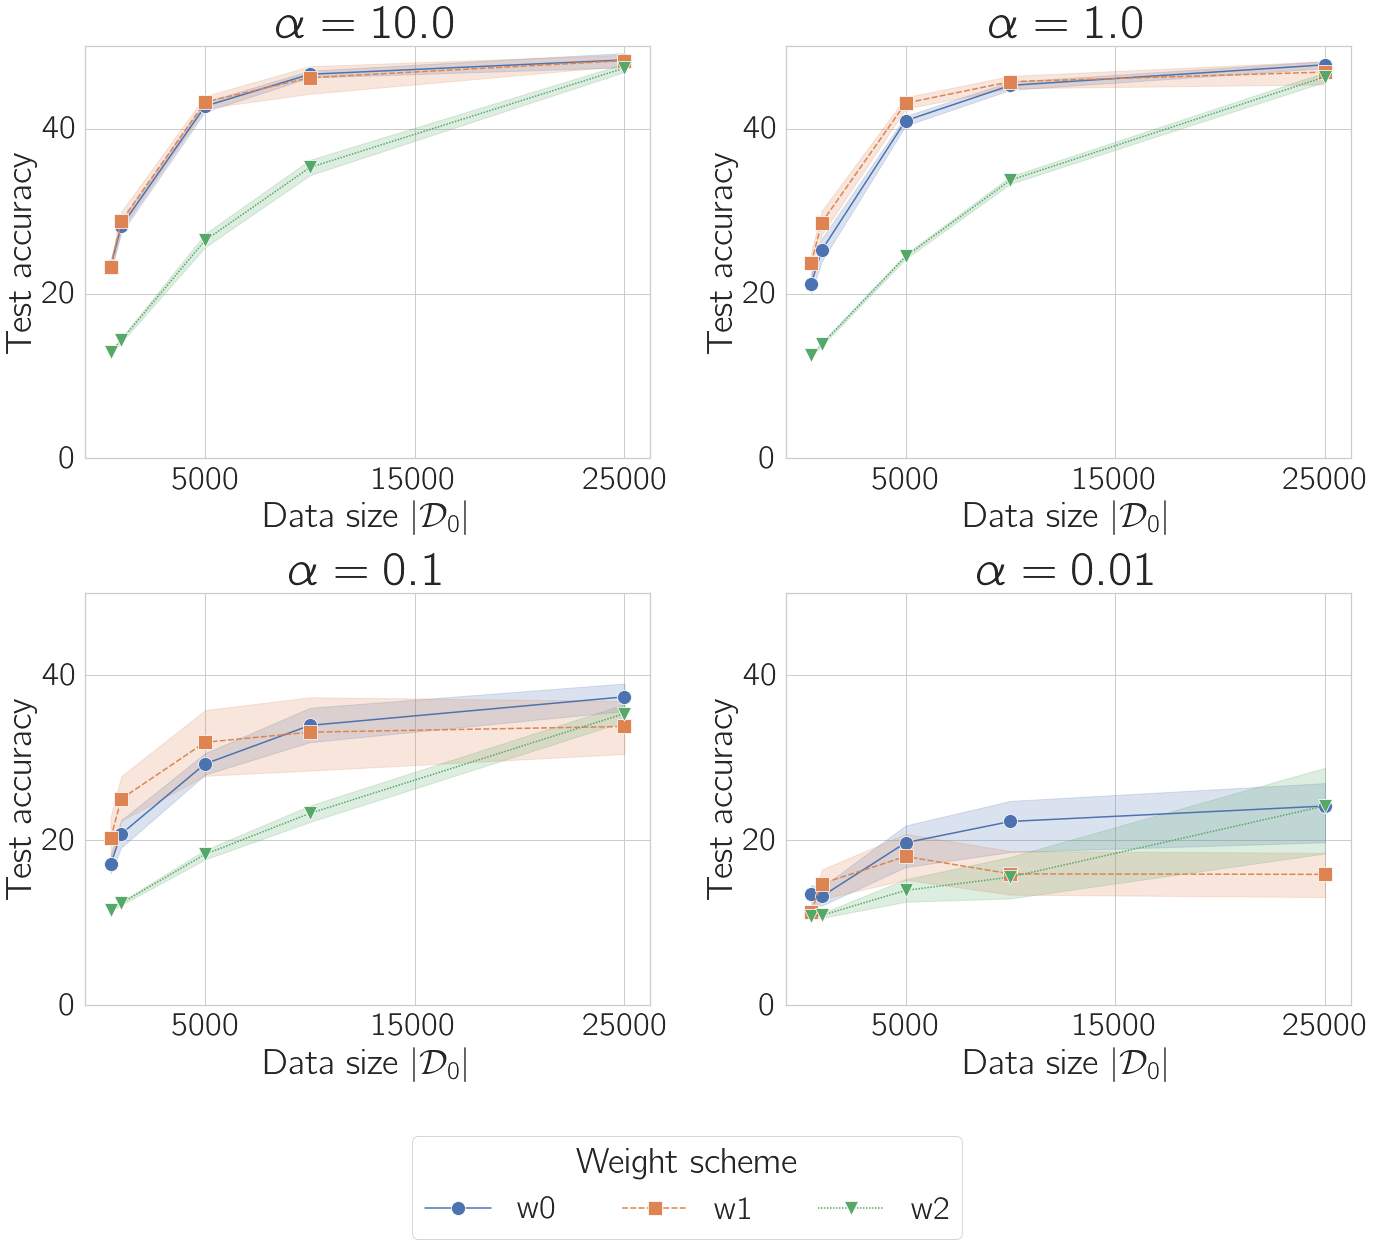

In [4]:
seeds = [0,2,3,4,5,6,7,10]
n_clients = 10
n_pub = [500, 1000, 5000, 10000, 25000]
model = "cifar10_resnet18"
dists = ["niid10.0", "niid1.0", "niid0.1", "niid0.01"]
schemes = [0, 1, 2]
student_model = "resnet18"

data = []
for d in dists:
    for n in n_pub:
        for w in schemes:
            settings_files = [f"{model}_c{n_clients}_{d}_s{i}" for i in seeds]
            # if w == 2:
            #     feded_accs, _ = get_feded_results(settings_files, n, student_model, "ce", w, summary=False)
            # else:
            #     feded_accs, _ = get_feded_results(settings_files, n, student_model, "mse", w, summary=False)
            feded_accs, _ = get_feded_results(settings_files, n, student_model, "mse", w, summary=False)
            for acc in feded_accs:
                data.append([n, acc, d, w])

df = pd.DataFrame(data, columns=['public samples', 'Test accuracy', 'Dist', 'Scheme'])

fig, ax = plt.subplots(2, 2, figsize=(20, 18))
ax = ax.flatten()
markers = ['o', 's', 'v']
for i in range(4):
    p = sns.lineplot(ax=ax[i], 
    data=df[df.Dist == dists[i]], 
    x='public samples', 
    y='Test accuracy', 
    hue='Scheme',
    style='Scheme', 
    palette=["C0", "C1", "C2"],
    legend=False)

    for j in range(3):
        p.lines[j].set_marker(markers[j])
        p.lines[j].set_markersize(14)

    ax[i].set_xlabel(r'Data size $|\mathcal{D}_0|$')
    ax[i].set_title(r'$\alpha={}$'.format(dists[i][4:]), fontsize=48)
    ax[i].set_xticks([5000, 15000, 25000])
    ax[i].set_ylim([0, 50])
    ax[i].set_yticks([0, 20, 40])

fig.legend(title='Weight scheme', handles=p.lines, labels=['w0', 'w1', 'w2'], ncol=3, loc='lower center')

plt.tight_layout()
plt.subplots_adjust(bottom=0.20)
plt.savefig('../../thesis_images/cifar10_npub.png', dpi=300)
plt.show()

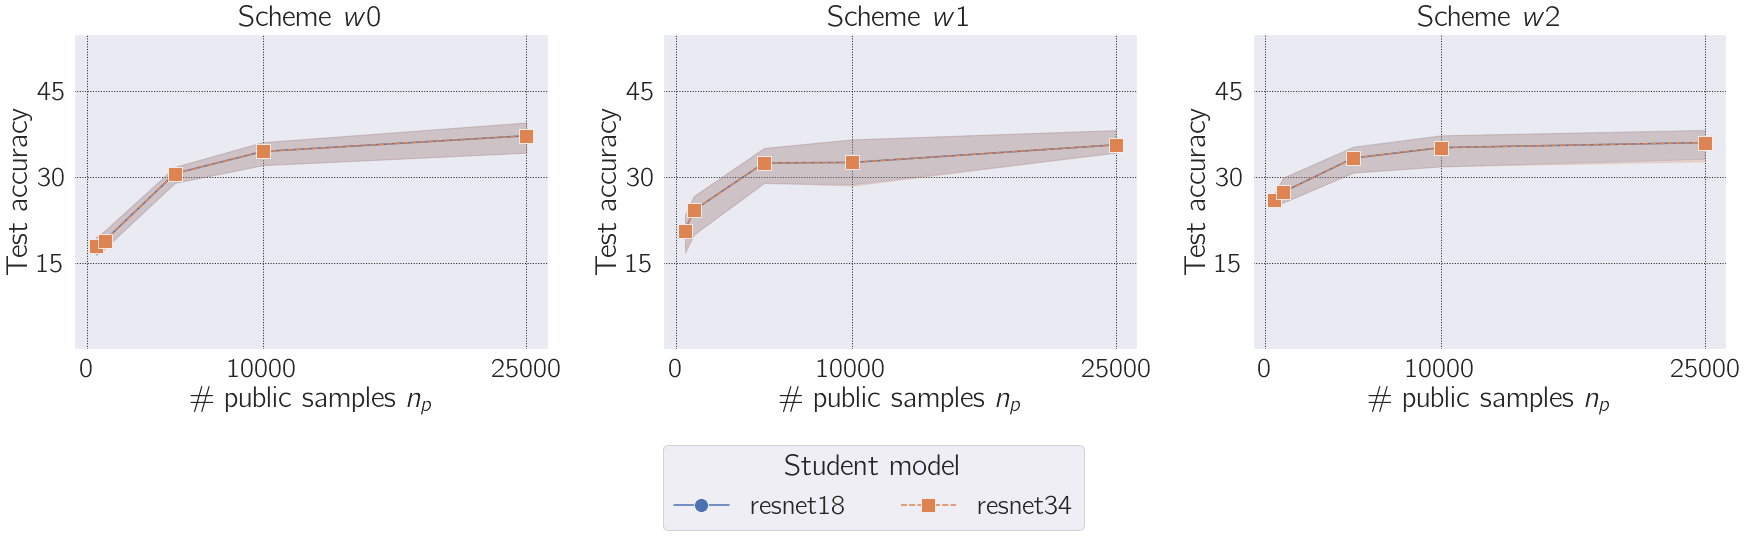

In [12]:
seeds = [0,2,3,4,5]
n_clients = 10
n_pub = [500, 1000, 5000, 10000, 25000]
model = "cifar10_resnet18"
students = ["resnet18", "resnet34"]
dist = "niid0.1"
schemes = [0, 1, 2]

data = []
for stu in students:
    for n in n_pub:
        for w in schemes:
            settings_files = [f"{model}_c{n_clients}_{dist}_s{i}" for i in seeds]
            if w == 2:
                feded_accs, _ = get_feded_results(settings_files, n, student_model, "ce", w, summary=False)
            else:
                feded_accs, _ = get_feded_results(settings_files, n, student_model, "mse", w, summary=False)

            for i in seeds:
                data.append([n, feded_accs[i-1], stu, w])

df = pd.DataFrame(data, columns=['public samples', 'Test accuracy', 'Student model', 'scheme'])

fig, ax = plt.subplots(1, 3, figsize=(25, 8))
markers = ['o', 's']
for i in range(3):
    p = sns.lineplot(ax=ax[i], 
    data=df[df.scheme == schemes[i]], 
    x='public samples', 
    y='Test accuracy', 
    hue='Student model',
    style='Student model', 
    palette=["C0", "C1"],
    legend=False)
    
    for j in range(2):
        p.lines[j].set_marker(markers[j])
        p.lines[j].set_markersize(14)

    ax[i].set_xlabel(r'\# public samples $n_p$')
    ax[i].set_title(r'Scheme $w{}$'.format(i))
    ax[i].set_xticks([0, 10000, 25000])
    ax[i].set_ylim([0, 55])
    ax[i].set_yticks([15, 30, 45])

fig.legend(title='Student model', handles=p.lines, labels=['resnet18', 'resnet34'], ncol=3, loc='lower center')

plt.tight_layout()
plt.subplots_adjust(bottom=0.35)
plt.savefig('../../thesis_images/cifar10_students_comparison.png', dpi=300)
plt.show()